In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import warnings
import pickle
warnings.filterwarnings('ignore')

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/Dataset/heart.csv')
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
heart_df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
445,55,M,NAP,136,228,0,ST,124,Y,1.6,Flat,1
572,64,M,ASY,150,193,0,ST,135,Y,0.5,Flat,1
247,48,M,ASY,122,275,1,ST,150,Y,2.0,Down,1
80,55,M,NAP,110,277,0,Normal,160,N,0.0,Up,0
450,52,M,NAP,122,0,0,Normal,110,Y,2.0,Down,1


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart_df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


# **Data Preprocessing**

In [ ]:
heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
heart_df.duplicated().sum()

np.int64(0)

In [ ]:
heart_df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
cat_col = heart_df.select_dtypes(include="object").columns

In [ ]:
heart_df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

# Converting Categorical Variable to Numeric


*   Sex : M = 0, F = 1
*   ChestPainType : ATA = 0, NAP = 1, ASY = 2, TA = 3
*   RestingECG : Normal = 0, ST = 1, LVH = 2
*   ExerciseAngina :  N = 0, Y = 1
*   ST_Slop : Up = 0, Flat = 1, Down = 2







In [ ]:
sex_map = {"M": 0, "F": 1}
chest_pain_map = {"ATA": 0, "NAP": 1, "ASY": 2, "TA": 3}
resting_ecg_map = {"Normal": 0, "ST": 1, "LVH": 2}
exercise_angina_map = {"N": 0, "Y": 1}
st_slope_map = {"Up": 0, "Flat": 1, "Down": 2}

heart_df["Sex"] = heart_df["Sex"].map(sex_map)
heart_df["ChestPainType"] = heart_df["ChestPainType"].map(chest_pain_map)
heart_df["RestingECG"] = heart_df["RestingECG"].map(resting_ecg_map)
heart_df["ExerciseAngina"] = heart_df["ExerciseAngina"].map(exercise_angina_map)
heart_df["ST_Slope"] = heart_df["ST_Slope"].map(st_slope_map)

print("Sex:", sex_map)
print("ChestPainType:", chest_pain_map)
print("RestingECG:", resting_ecg_map)
print("ExerciseAngina:", exercise_angina_map)
print("ST_Slope:", st_slope_map)


Sex: {'M': 0, 'F': 1}
ChestPainType: {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}
RestingECG: {'Normal': 0, 'ST': 1, 'LVH': 2}
ExerciseAngina: {'N': 0, 'Y': 1}
ST_Slope: {'Up': 0, 'Flat': 1, 'Down': 2}


In [ ]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [ ]:
heart_df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


# Imputing the 0 values in cholesterol column with KNN Imputer

In [ ]:
np.nan

nan

In [ ]:
heart_df['Cholesterol'].replace(0,np.nan,inplace=True)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(heart_df)
heart_df = pd.DataFrame(after_impute,columns=heart_df.columns)

In [ ]:
heart_df['Cholesterol'].isna().sum()

np.int64(0)

In [ ]:
count = 0
for i in heart_df['Cholesterol']:
  if i == 0:
    count += 1
print(count)

0


# Doing the same for Resting Blood Pressure

In [ ]:
heart_df['RestingBP'][heart_df['RestingBP'] == 0]

,RestingBP
449,0.0


In [ ]:
from sklearn.impute import KNNImputer
heart_df['RestingBP'].replace(0,np.nan,inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(heart_df)
heart_df = pd.DataFrame(after_impute,columns=heart_df.columns)

In [ ]:
heart_df['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 170., 142., 190., 135., 180.,
       108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,  95.,
        80., 137., 185., 165., 126., 152., 116., 144., 154., 134., 104.,
       139., 131., 141., 178., 146., 158., 123., 102.,  96., 143., 172.,
       156., 114., 127., 101., 174.,  94., 148., 117., 192., 129., 164.])

In [ ]:
heart_df['RestingBP'].isnull().sum()

np.int64(0)

# Change Columns type to int

In [ ]:
withoutOldPeak = heart_df.columns
withoutOldPeak = withoutOldPeak.drop('Oldpeak')
heart_df[withoutOldPeak] = heart_df[withoutOldPeak].astype('int32')

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(11)
memory usage: 46.7 KB


In [ ]:
heart_df.sample(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
806,70,0,2,145,174,0,0,125,1,2.6,2,1
526,65,0,2,144,312,0,2,113,1,1.7,1,1
314,53,0,2,80,188,0,0,141,1,2.0,2,0


In [ ]:
heart_df.corr()['HeartDisease'][:-1].sort_values()

,HeartDisease
MaxHR,-0.400421
Sex,-0.305445
RestingECG,0.061011
Cholesterol,0.101263
RestingBP,0.118333
FastingBS,0.267291
Age,0.282039
Oldpeak,0.403951
ChestPainType,0.459017
ExerciseAngina,0.494282


In [ ]:
!pip install plotly

# **Data Visualization**

In [ ]:
import plotly.express as px

In [ ]:
px.line(heart_df.corr()['HeartDisease'][:-1].sort_values())

# **Age and HeartDisease Distribution**

In [ ]:
px.sunburst(heart_df,path=['HeartDisease','Age'])

In [ ]:
px.histogram(heart_df,x='Age',color='HeartDisease')

# **Percentage of HeartDisease data distribution**

In [ ]:
px.pie(heart_df,names='HeartDisease',title='Percentage of HeartDisease classes distribution')

# **Sex vs Heart Disease**

In [ ]:
px.histogram(heart_df,x='Sex',color='HeartDisease')

# **ChestPainType vs HeartDisease**

In [ ]:
px.histogram(heart_df,x='ChestPainType',color='HeartDisease')

# **RestingBP vs HeartDisease**

In [ ]:
heart_df['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int32)

In [ ]:
px.sunburst(heart_df,path=['HeartDisease','RestingBP'])

# **FastingBS vs Heart Disease**

In [ ]:
px.histogram(heart_df,x='FastingBS',color='HeartDisease')

# **MaxHR vs Heart Disease**

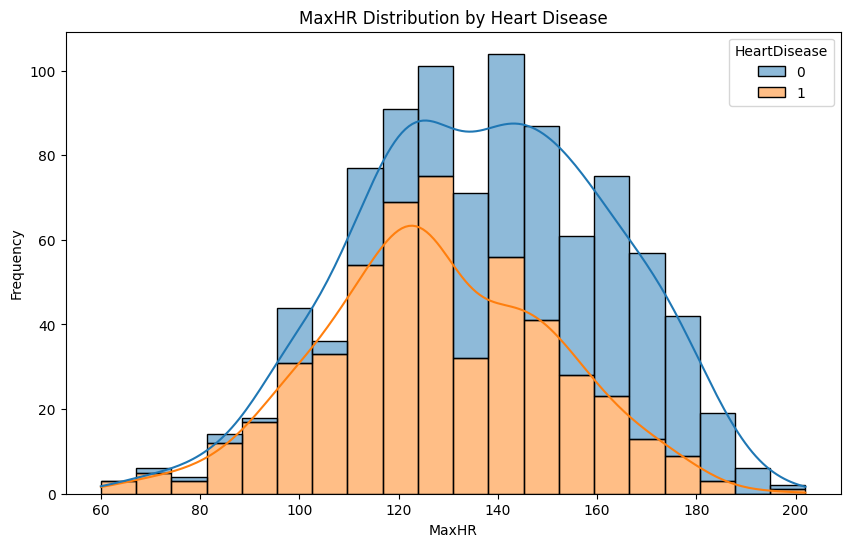

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=heart_df, x='MaxHR', hue='HeartDisease', multiple='stack', kde=True)
plt.title('MaxHR Distribution by Heart Disease')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.show()

# **ST_Slope vs Heart Disease**

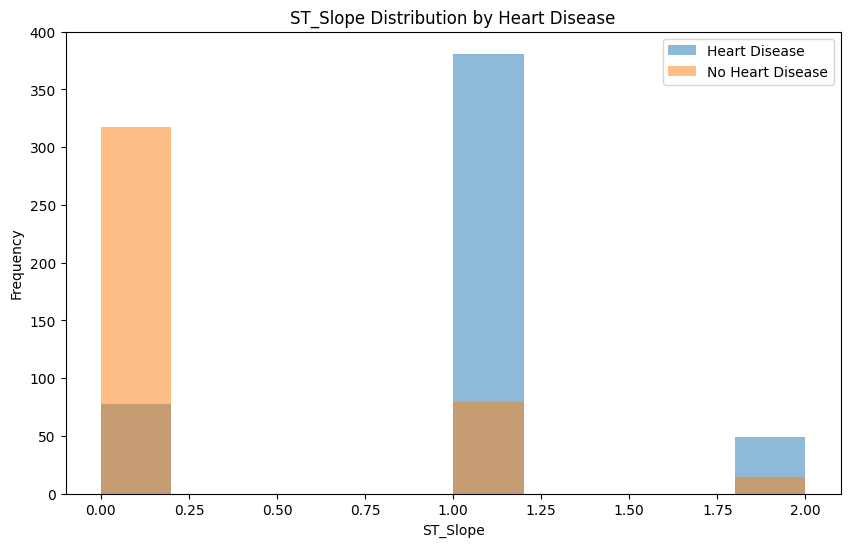

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(heart_df[heart_df['HeartDisease'] == 1]['ST_Slope'], alpha=0.5, label='Heart Disease')
plt.hist(heart_df[heart_df['HeartDisease'] == 0]['ST_Slope'], alpha=0.5, label='No Heart Disease')
plt.xlabel('ST_Slope')
plt.ylabel('Frequency')
plt.title('ST_Slope Distribution by Heart Disease')
plt.legend()
plt.show()

# **ExerciseAngina vs Heart Disease**

In [ ]:
px.histogram(heart_df,x='ExerciseAngina',color='HeartDisease')


# **Correlation**

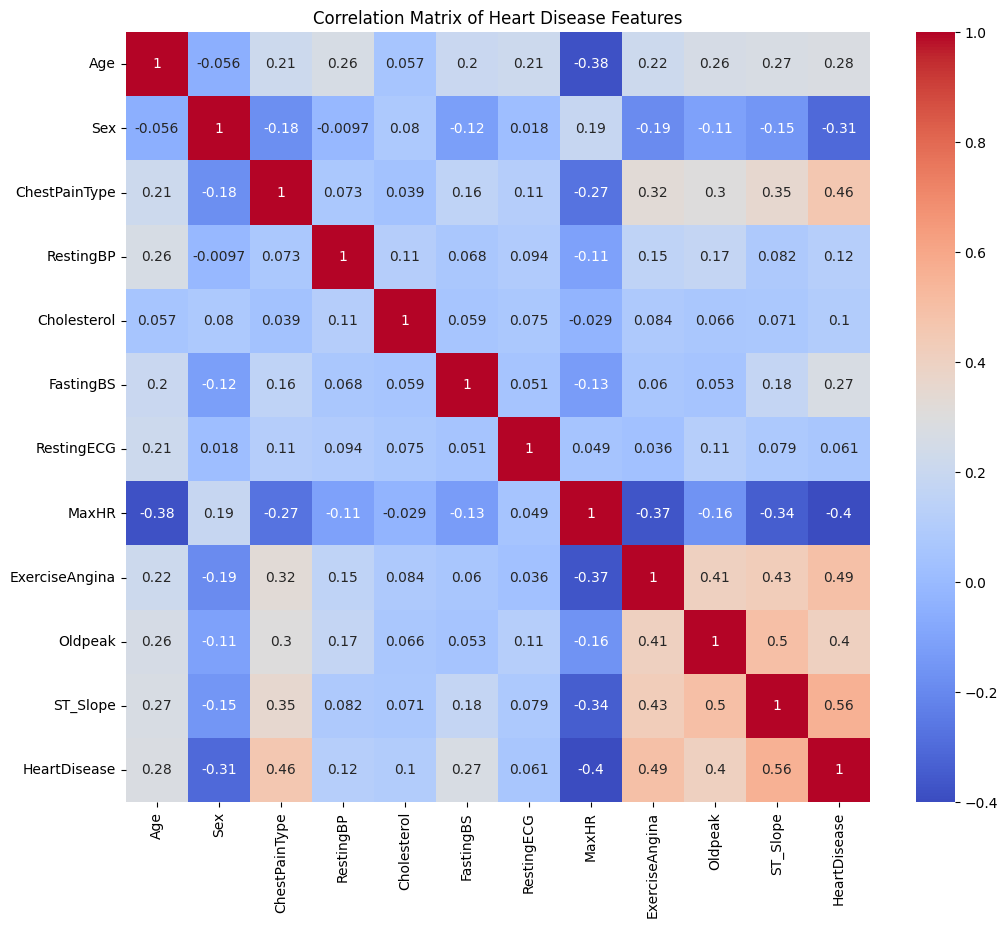

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    heart_df.drop('HeartDisease',axis=1),
    heart_df['HeartDisease'],
    test_size=0.2,
    random_state=42,
    stratify=heart_df['HeartDisease']
)

# **Model Training**

# **Logistic Regression**




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8586956521739131


# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.842391304347826


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8043478260869565


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


# **XGBoost**

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.842391304347826


# **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8695652173913043


# **K-Nearest Neighbors (KNN) Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.6521739130434783


# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8695652173913043


# **Model Comparison**

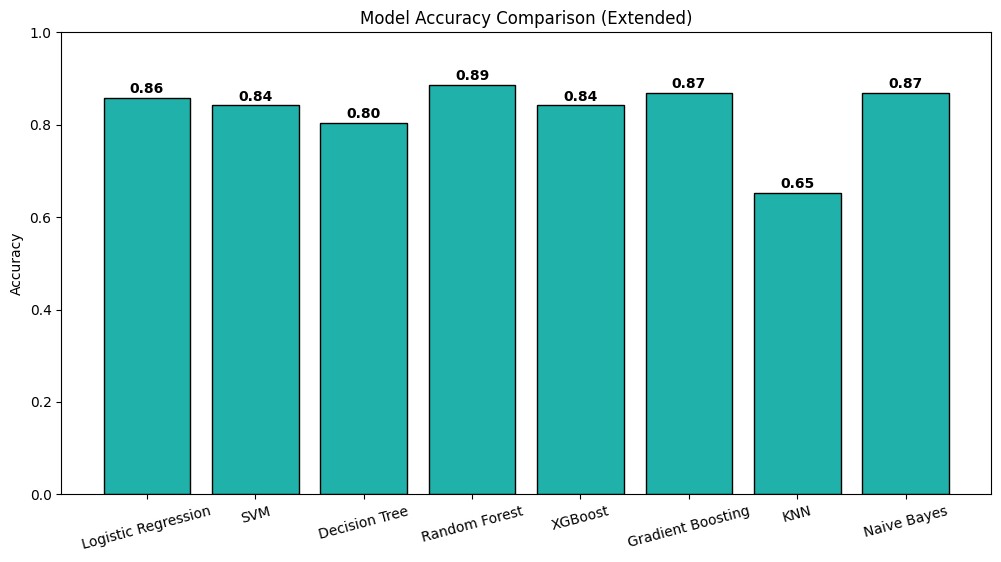

In [ ]:
"""# **Model Comparison**"""

models = {
    'Logistic Regression': lr,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Gradient Boosting': gb_model,
    'KNN': knn_model,
    'Naive Bayes': nb_model
}

names = []
scores = []

for name, model in models.items():
    pred = model.predict(X_test)
    names.append(name)
    scores.append(accuracy_score(y_test, pred))

plt.figure(figsize=(12,6))
plt.bar(names, scores, color='lightseagreen', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Extended)')
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.xticks(rotation=15)
plt.show()
